# Linear regression via gradient descent

Please follow these instructions carefully:

- Read all the code in the notebook.
- There are 7 problems.  For each, replace the comment YOUR CODE HERE with your code.
- Do not modify the code in other ways.  You may want to write additional test code while you're getting your code working.  If so, mark your test code clearly and then remove it before submitting.
- Before submitting your code, select 'Restart and run all' from the Runtime menu.

v0.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sys

## Partial derivatives

In multivariable calculus, you are given the definition of a function f(x,y) and told to find the partial derivative df/dx.  The partial derivative is a function, and in general is a function of x and y.

For example, if f is defined by f(x,y) = 2x^2 + xy, for which df/dx is 4x + y and df/dy = x.  

df/dx and df/dx are functions.  If (x,y) = (1,2) then df/dx(x,y) is 6 and df/dy(x,y) is 1.

In [3]:
def update_ith(x, i, u):
    """ Return a copy of x with the ith element changed to u. """
    
    z = x.copy()
    z[i] = u
    return z    

def partial_deriv(f, i, h=0.00001):
    """ Numerical approximation to the partial derivative of f with respect to its ith input """

    # use the "two-sided" approximation of the partial derivative
    return lambda x: (f(update_ith(x, i, x[i]+h)) - f(update_ith(x, i, x[i]-h)))/(2*h) 

In [4]:
# test update_ith() and partial_deriv()

x = np.array([1.0, 2.0])
print(update_ith(x, 0, 1.1))
print(update_ith(x, 1, 2.2))

# f takes as input an array x of length 2
def f(x):
    return 2*x[0]**2 + x[0]*x[1]

print(f(x))
print(f(update_ith(x, 0, x[0]+0.01)))

fx = partial_deriv(f, 0)
fy = partial_deriv(f, 1)
print(f'{fx(x):.5f}')
print(f'{fy(x):.5f}')

[1.1 2. ]
[1.  2.2]
4.0
4.0602
6.00000
1.00000


## Gradients

The gradient of f take as input x,y and returns the vector (df/dx(x,y), df/dy(x,y)).

For example, let f be defined by f(x,y) = 2x^2 + xy, for which df/dx is 4x + y and df/dy = x.  
The gradient of f, applied at input x=1,y=2 is (df/dx(1,2), df/dy(1,2)), which is (4(1) + 1, 1) = (5,1).

We can compute the value of a gradient numerically, just as we did for derivatives.

### Problem 1

Implement the body of the gradient() function.  Use function partial_deriv() in your code.
The function that is returned by gradient() should itself return a NumPy array.

Hint: you may want to use a list comprehension.

In [5]:
def gradient(f, n):
    """ return the gradient of multi-variate function f with n arguments (provided as a single array) """
    
    return lambda x: # YOUR CODE HERE

In [6]:
# test the gradient() function

def f(x):
    return 2*x[0]**2 + x[0]*x[1]

# print the gradient of f
f_grad = gradient(f, 2)    # 2 because f is a function of 2 arguments
xs = [ np.array(x) for x in [[1.0, 2.0], [0.0, 0.0], [2.0, -1.0]] ]
for x in xs:
    print(f'x: {x}, f_grad(x): {f_grad(x)}')

x: [1. 2.], f_grad(x): [6. 1.]
x: [0. 0.], f_grad(x): [0. 0.]
x: [ 2. -1.], f_grad(x): [7. 2.]


## Gradient descent

In gradient descent we want to find the value of x that minimizes (or maximizes) a function f.  We do this by starting with some x, computing the value of the gradient of f at x, and then using that value to make an adjustment to x.

### Problem 2

Implement the body of the grad_descent() function.  Be sure to use the L1 norm as indicated in the comments.

In [7]:
def grad_descent(f, n, alpha=0.01, n_iterations=1000, threshold=0.0001):
  """ Return the value x for which function f(x) is minimum, and also
  the values of x along the path of gradient descent.  
  The algorithm terminates when iteration limit is reach or when the
  L1 norm of the change to x is below the threshold.  """
  
  f_grad = gradient(f, n)

  x = np.zeros(n)
  xs = []
  for i in range(n_iterations):
    xs.append(x.copy())           # this is needed, else all values in xs will be the same
    
    # YOUR CODE HERE

  print('warning: reached iteration limit')
  return x, xs

In [8]:
# test the grad_descent() function

# test on a 1D function, for comparison with grad_descent_1d()
f1 = lambda x: (x[0] - 1)**2
f2 = lambda x: 0.2*(x[0]**2) + np.sin(x[0])
for f in [f1, f2]:
  x, xs = grad_descent(f, 1)
  print(f'x = {x.round(5)}, f(x) = {f(x):.3f}')
    
# test on 2D function
f = lambda x: (x[0]-1)**2 + (x[1]+1)**2 + 2.0
x, xs = grad_descent(f, 2)
print(f'x = {x.round(5)}, f(x) = {f(x):0.3f}')

x = [0.99517], f(x) = 0.000
x = [-1.10297], f(x) = -0.649
x = [ 0.99757 -0.99757], f(x) = 2.000


Plot the value of the loss function as gradient descent proceeds.

In [9]:
def plot_descent(f, xs):
  """ plot value of function f using history xs of gradient descent """
  plt.plot(range(len(xs)), [f(x) for x in xs])
  plt.xlabel('iteration')
  plt.ylabel('f(x)')
  plt.title('Progress of gradient descent')
  plt.grid();

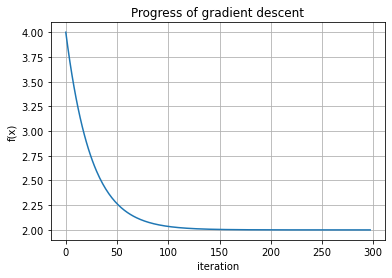

In [10]:
# plot progress of gradient descent for function f
x, xs = grad_descent(f, 2)
plot_descent(f, xs)

## MSE loss

The key idea for training linear regression is that we want to use gradient descent to find the model parameters that minimize the loss function.  For linear regression, the loss function is "mean squared error" (MSE).

Create some fake training data.  Note that the coefficients are in an array, and that the data has an extra first column of ones to make computing the value of the linear model simple.

Because we generated the data ourselves, we know the true coefficients of the line.

In [11]:
# x is the array of predictor values, y is the target value
# X,y are NumPy arrays
np.random.seed(0)  # set seed for repeatability

# the coefficients b0, b1
b = np.array([1.5, 2.5])

# generate points on the line y = b0 + b1*x, then add noise
n = 20
x1 = np.linspace(0, 10, num=n)   # n values evenly spaced from 0 to 10

X = x1.reshape(n, 1)
X1 = np.c_[np.ones(n), X]        # add new first column of 1's
y = X1.dot(b) 

noise = np.random.normal(scale=4.0, size=n)   # n values sampled from normal distributions
y = y + noise

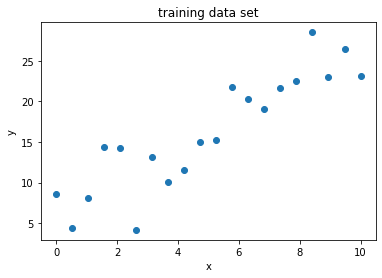

In [12]:
# plot the training data
plt.scatter(x1, y);
plt.title('training data set')
plt.xlabel('x')
plt.ylabel('y');

### Problem 3

Implement the body of the mse_loss() function.  Note that to compute the mean squared error we need both the model parameters and the training data.

In [13]:
def mse_loss(b, X1, y):
    """ Return MSE loss for a linear function based on model parameters b and training data X1, y. """
    
    # do not make any library calls
    # use .dot() in your code
    return # YOUR CODE HERE

In [14]:
# test the mse_loss() function by computing the loss for various
# values of the linear parameters b

for b1 in [b, np.array([b[0]-1, b[1]]), np.array([b[0], b[1]+1])]:
    print(f'b: {b1}, mse_loss(b): {mse_loss(b1, X1, y):.3f}')

b: [1.5 2.5], mse_loss(b): 16.751
b: [0.5 2.5], mse_loss(b): 22.306
b: [1.5 3.5], mse_loss(b): 36.568


## Linear regression

Now we can put together our gradient descent function and MSE loss function to perform linear regression.

The function mse_loss() takes parameters b, X1, and y.  However, gradient_descent() expects to be passed a function that takes only a single parameter.

Therefore, we define a function loss() that is like mse_loss() except it only takes parameter b.  The data values X1 and y are "hard wired" into loss().

### Problem 4

Define function loss(). Use a lambda expression and call mse_loss().  This is a very simple one-liner.

In [15]:
loss = # YOUR CODE HERE

In [16]:
# test the loss() function
# the output should match the output for the test of mse_loss() above

for b1 in [b, np.array([b[0]-1, b[1]]), np.array([b[0], b[1]+1])]:
    print(f'b: {b1}, loss(b): {loss(b1):.3f}')

b: [1.5 2.5], loss(b): 16.751
b: [0.5 2.5], loss(b): 22.306
b: [1.5 3.5], loss(b): 36.568


Now we perform gradient descent using the loss function.

In [17]:
b_estimated, history = grad_descent(loss, 2)
print(b_estimated.round(3))

[6.023 2.049]


Plot the training data and the best-fit line.

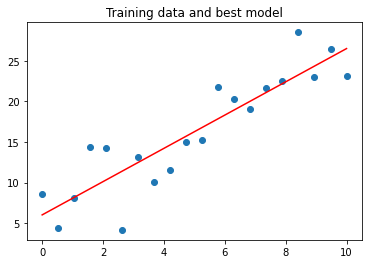

In [18]:
plt.scatter(x1, y)
y_pred = X1.dot(b_estimated)
plt.plot(x1, y_pred, c='red')
plt.title('Training data and best model');

Look at how loss changed during gradient descent.

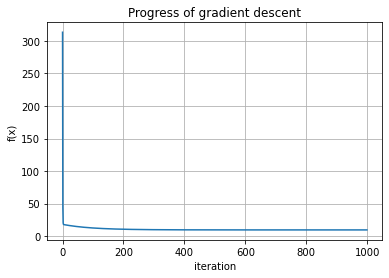

In [19]:
plot_descent(loss, history)

### Plot the change of b0,b1 over time

Another way to visualize the progress of gradient descent is to see how the model parameters change over time.  In this plot we show the value of both model parameters.  In this plot you can't see the loss value.  Remember that the initial value of b0, b1 is 0, 0.

Do you see a "gulley" in the plot?

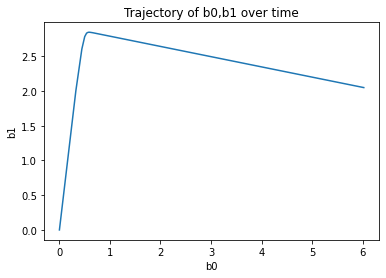

In [20]:
plt.plot([b[0] for b in history], [b[1] for b in history])
plt.xlabel('b0')
plt.ylabel('b1')
plt.title('Trajectory of b0,b1 over time');

### Scale the x data and try again

We know that data should be scaled prior to running gradient descent.  What happens to the gulley once the data is scaled?

In [21]:
# scale the data
x_scaled = (x1 - x1.mean())/x1.std()
X_scaled = np.column_stack((np.ones(x1.size), x_scaled))

### Problem 5

Define a version of the loss() function that uses the scaled data.

In [22]:
loss_with_scaled_data = # YOUR CODE HERE

Try gradient descent again.  Note the new loss function.

In [23]:
b_estimated, history = grad_descent(loss_with_scaled_data, 2)
print(b_estimated)

[16.27383825  6.20533778]


Compare this plot to the plot above with unscaled data.  Notice the change in shape and change in number of iterations.

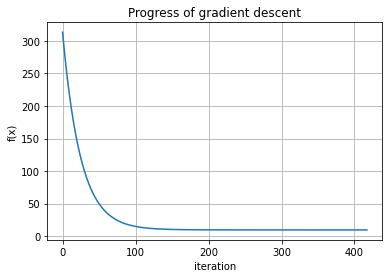

In [24]:
plot_descent(loss_with_scaled_data, history)

Compare this plot to the trajectory plot above.  It is completely different.

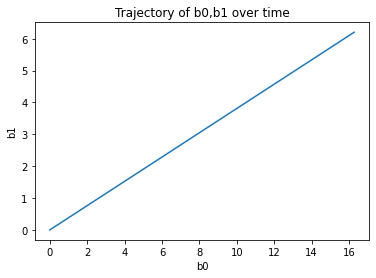

In [25]:
plt.plot([b[0] for b in history], [b[1] for b in history])
plt.xlabel('b0')
plt.ylabel('b1')
plt.title('Trajectory of b0,b1 over time');

## Perform linear regression on a real data set

Now let's use our code to perform linear regression on a real data set.  This is a small data set with only 38 rows.

We'll predict a car's MPG from data about it's weight, horsepower, etc.

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/cars-1978.csv')

predictors = ['Weight', 'Drive_Ratio', 'Horsepower', 'Displacement']
X = df[predictors].values
X = StandardScaler().fit_transform(X)    # scale the data!
X1 = np.c_[np.ones(X.shape[0]), X]       # adds new first column of 1's
y = df['MPG'].values

### Problem 6

Define a version of the loss() function that uses the cars data.

In [27]:
loss = # YOUR CODE HERE

### Problem 7

Train a linear model for the cars data using gradient descent.

You may want to tweak the learning rate and number of iterations here.

In [28]:
b_estimated, history = # YOUR CODE HERE

In [29]:
# test the result of gradient descent on the cars data

print(f'intercept:{b_estimated[0]:.3f}')
print(f'other coefficients:{b_estimated[1:].round(3)}')

intercept:24.761
other coefficients:[-7.969 -1.809 -1.267  2.158]


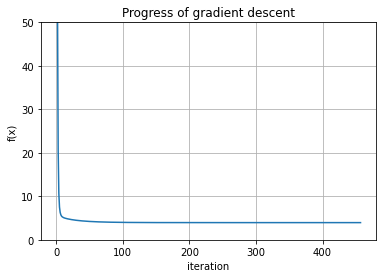

In [30]:
# note that the y axis limit is 50
plot_descent(loss, history)
plt.ylim(0, 50);

Compare the results we get with Scikit Learn's linear regression algorithm, which probably uses the "normal equation".

In [31]:
regr = LinearRegression().fit(X, y)

print(f'intercept:{regr.intercept_:.3f}')
print(f'other coefficients:{regr.coef_.round(3)}')

intercept:24.761
other coefficients:[-7.971 -1.809 -1.266  2.16 ]
